### Denosing Autoencoder

In [17]:
!pip install --upgrade pip
!pip install tensorflow numpy matplotlib scipy

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [19]:
# Load images
(x_train, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [20]:
# TODO: Complete the function
def add_noise(x: np.ndarray, n_factor: float = 0.3) -> np.ndarray:
    """
    Add noise to the dataset
    """
    noise = np.random.uniform(-n_factor, n_factor, size=x.shape)
    x_noisy = x + noise
    x_noisy = tf.clip_by_value(x_noisy, clip_value_min=0., clip_value_max=1.)  # Clip the pixels between 0.0 to 1.0
    return x_noisy

In [21]:
n_factor = 0.3
x_train_noisy = add_noise(x_train, n_factor=n_factor)
x_test_noisy = add_noise(x_test, n_factor=n_factor)

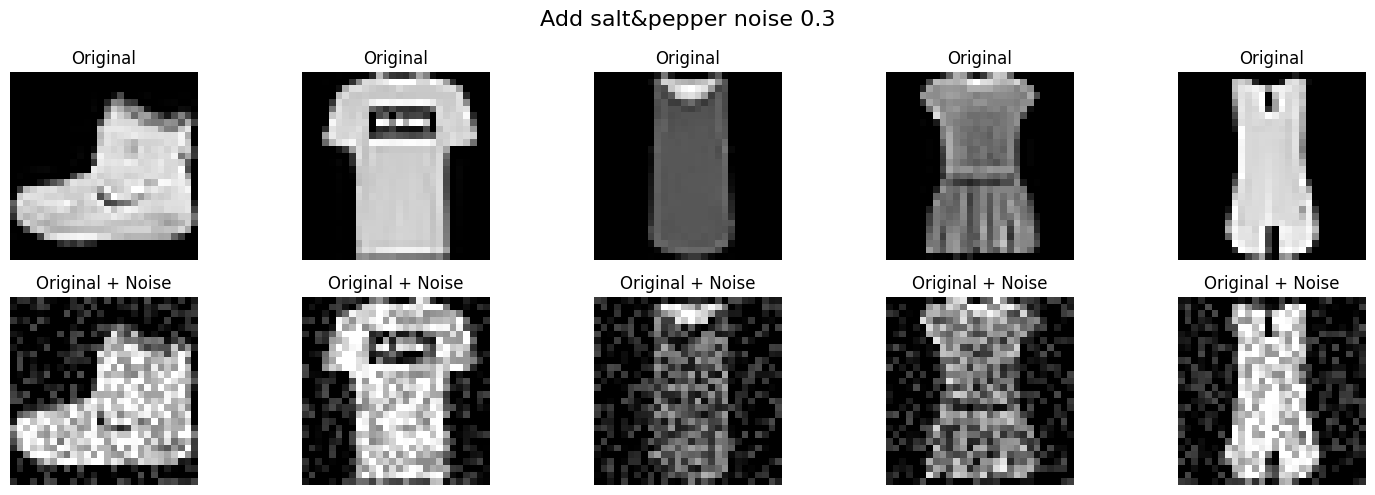

In [22]:
# Create a new figure and set its size
N = 5
plt.figure(figsize=(15, N))

# Plot the images from the first set in the first row
for i in range(N):
    plt.subplot(2, N, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # assuming images are grayscale
    plt.axis('off')
    plt.title('Original')

# Plot the images from the second set in the second row
for i in range(N):
    plt.subplot(2, N, N + i + 1)
    plt.imshow(x_train_noisy[i], cmap='gray')  # assuming images are grayscale
    plt.axis('off')
    plt.title('Original + Noise')

plt.suptitle(f'Add salt&pepper noise {n_factor}', fontsize=16)
plt.tight_layout()
plt.show()

### Build a model

In [23]:
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim: int = 2, shape: tuple = (28, 28)) -> None:
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

        # Encoder layers
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=shape),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(latent_dim)
        ])

        # Decoder layers
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(latent_dim,)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(np.prod(shape), activation='sigmoid'),
            tf.keras.layers.Reshape(shape)
        ])

    def call(self, inputs):
        latent = self.encoder(inputs)
        decoded = self.decoder(latent)
        return decoded

### Prepare training

In [24]:
# Compile model
latent_dim = 16
shape = x_train.shape[1:]
model = Autoencoder(latent_dim=latent_dim, shape=shape)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.MeanSquaredError())

In [25]:
# Trainning
EPOCHS = 5
BATCH_SIZE = 32
model.fit(x_train_noisy, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0394
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0183
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0161
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0149
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0143


### Test

In [26]:
# TODO: Make a prediction
predictions = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


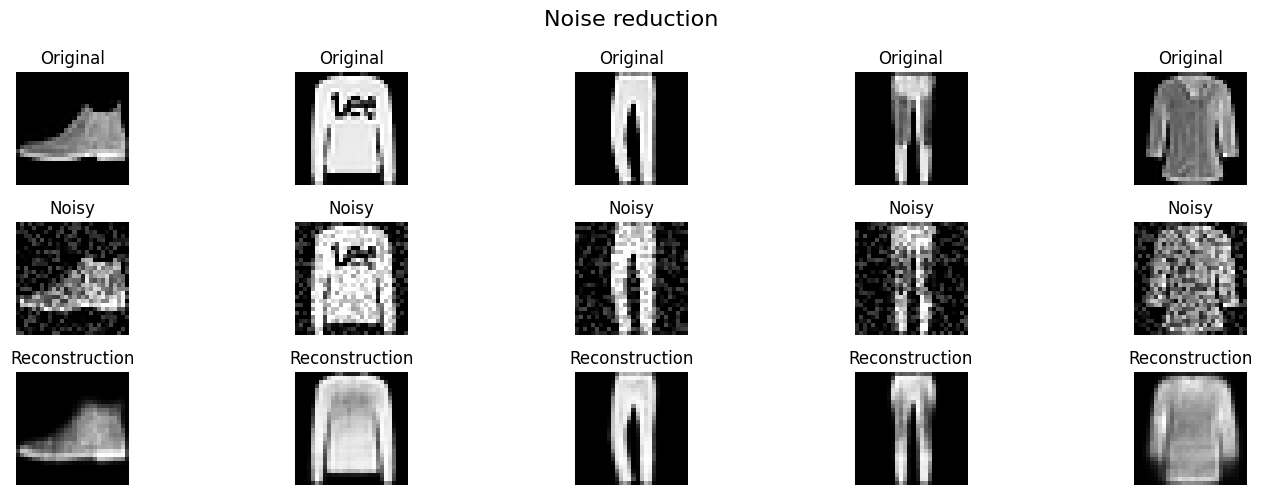

In [27]:
# Create a new figure and set its size
N = 5
plt.figure(figsize=(15, N))

# Plot the images from the first set in the first row
for i in range(N):
    plt.subplot(3, N, i + 1)
    plt.imshow(x_test[i], cmap='gray')  # assuming images are grayscale
    plt.axis('off')
    plt.title('Original')

# Plot the images from the second set in the second row
for i in range(N):
    plt.subplot(3, N, N + i + 1)
    plt.imshow(x_test_noisy[i], cmap='gray')  # assuming images are grayscale
    plt.axis('off')
    plt.title('Noisy')

# Plot the images from the third set in the third row
for i in range(N):
    plt.subplot(3, N, 2 * N + i + 1)
    plt.imshow(predictions[i], cmap='gray')  # assuming images are grayscale
    plt.axis('off')
    plt.title('Reconstruction')

plt.suptitle('Noise reduction', fontsize=16)
plt.tight_layout()
plt.show()